In [1]:
import os
import sys
import matplotlib.pyplot as plt

proj_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if proj_path not in sys.path:
    sys.path.append(proj_path)

from wavelet_filter import Wavelet_Filter
from utils import plot_original_vs_filtered, plot_signal
from scipy.datasets import electrocardiogram

In [2]:
ecg = electrocardiogram()
sr = 360
start = 0
end = 10000

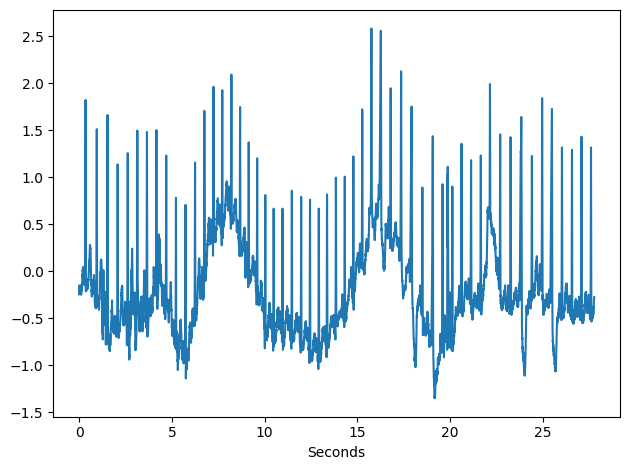

In [3]:
# Original ECG signal
plot_signal(x=ecg, sr = sr, start = start, end = end)

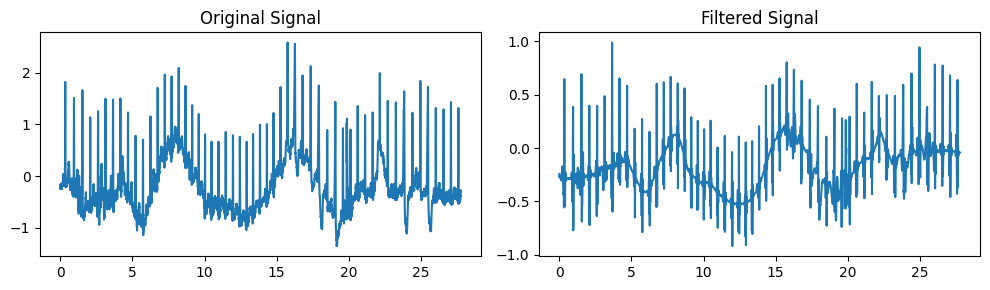

In [11]:
wavelet_filter = Wavelet_Filter(threshold_type="soft", wavelet="db5", 
                                level = 1, mode = "per", x = ecg)

reconstr = wavelet_filter._filter(scaling_factor=0.4, universal=False, operation="mean")
plot_original_vs_filtered(x = ecg, x_hat = reconstr, 
                            start = start, 
                            end = end, 
                            sr=sr)